In [1]:
from functions import *
from variables import *
from datetime import *

###################################################
###           PARAMETRES DES REQUETES          ####
###################################################

# $cCode pour chercher par pays
# $distance pour chercher dans un rayon autour de $city
# $name pour chercher par nom
# $gameId pour filtrer par jeu
# $slug pour filtrer par "slug" (la partie à la fin du lien start.gg)
  # Par exemple dans le lien "https://www.start.gg/tournament/genesis-8/details", le slug est "tournament/genesis-8" ou juste "genesis-8"
# $after et $before pour chercher les évènements à garder avant ou après une certaine date
  # today pour aujourd'hui, get_date(jour,mois,année) pour une autre date
# $page et $perPage pour paginer les évènements

params_get_events={
  "cCode": "FR", 
  "distance": "10km", 
  "city": ville_coord["Montpellier"],
  # "name": "Downtown", 
  "gameId": game_Ids["Super Smash Bros. Ultimate"],
  # "slug": "yggdrasil-1-1",
  # "after": today,
  "after": get_date(1,1,2024),
  "before":  get_date(2,7,2024),
  # "before": today,
  "perPage": 500, 
  "page": 1
}

params_standings_seedings={
  "perPage": 50,
}


In [2]:

##################################################################
###           RECUPERATION DES EVENEMENTS A ANALYSER          ####
##################################################################
 
singles = get_singles_id(params_get_events, url, headers)
# singles=tournois_sauf_flamingoat
# singles=misstechs


In [3]:
singles

{1165971: 'The Roll’Inn#26',
 1165969: "Miss'Tech#60",
 1161681: 'The Roll’Inn#25',
 1131369: 'Yggdrasil #3',
 1157577: 'Smash Downtown #32 - Smash à Lez x Burnout',
 1157571: 'The Roll’Inn#24',
 1157569: "Miss'Tech#59",
 1153371: 'The Roll’Inn#23',
 1153370: "Miss'Tech#58",
 1148869: 'Smash Downtown #31 - Smash à Lez x Burnout',
 1148861: 'The Roll’Inn#22',
 1148859: "Miss'Tech#57",
 1144715: "The Roll'Inn #21",
 1145349: "Miss'Tech#56",
 1140939: 'Smash Downtown #30 - Smash à Lez x Burnout',
 1136292: "Miss'Tech#55",
 1131257: 'Smash Downtown #29 - Smash à Lez x Burnout',
 1131253: "Miss'Tech#54",
 1092534: "The Flamin'Goat #6 - Smash à Lez x MES Esport",
 1126771: "Miss'Tech#53",
 1121814: 'Smash Downtown #28 - Smash à Lez x Burnout',
 1121808: "Miss'Tech#52",
 1117094: "Miss'Tech#51",
 1111736: 'Smash Downtown #27 - Smash à Lez x Burnout',
 1111734: "Miss'Tech#50",
 1107026: "Miss'Tech#49",
 1102045: 'Smash Downtown #26 - Smash à Lez x Burnout',
 1102044: "Miss'Tech#48",
 1097122: 

In [6]:
####################################
###           ANALYSES          ####
####################################

# print_tournaments(singles)

# taille_commu(5,singles,params_standings_seedings,url,headers) 
# most_regu(10,singles,params_standings_seedings,url,headers)
# least_regu(50,5,singles,params_standings_seedings,url,headers)
# surseed_sousseed(20,5,singles,params_standings_seedings,url,headers)
# max_tournois(100,singles,params_standings_seedings,url,headers)
# max_top_x(30,8,singles,params_standings_seedings,url,headers)

# Faire un DF avec: Pseudo, liste placements, SPR total, SPR moyen

# best_performances(20,singles,params_standings_seedings,url,headers)
# worst_performances(20,singles,params_standings_seedings,url,headers)
# top_seed(64,test,params_standings_seedings,url,headers)
# top_standings(16,singles,params_standings_seedings,url,headers)
# affrontements_freq(50,singles,params_standings_seedings,url,headers)
# bracket_demon(100,5,singles,params_standings_seedings,url,headers)
# count_sets(singles,params_standings_seedings,url,headers)
# count_games(singles,params_standings_seedings,url,headers)
# get_setcount_players('Erakos','Ewanz',singles,params_standings_seedings,url,headers)
# get_setcount_prefix("BaL","NdL", singles, params_standings_seedings, url, headers)
# character_data = get_character_usage(singles, url, headers).sort_values(by=['Games'], ascending=False)
player_most_characters(singles, url, headers)
# upsets=(get_upsets(singles,params_standings_seedings,url,headers))
# for i in upsets:
#     for j in range(len(i)):
#         print(i[j])
# count_upsets(singles,params_standings_seedings,url,headers, False)
# biggest_upsets(50,singles,url,headers)
# max_upsets_realises(20,singles,params_standings_seedings,url,headers)
# max_upsets_subis(20,singles,params_standings_seedings,url,headers)
# max_upsets_subis_par_defaite(20,singles,params_standings_seedings,url,headers)
# min_upsets_subis(500,singles,params_standings_seedings,url,headers)
# placements=get_player_placement("El Tépe",singles,params_standings_seedings,url,headers)
# n=0
# for event in placements:
#   if placements[event] == 9:
#     n+=1
# print("El Tépe a fini 9ème",n,"fois en", len(placements),"participations (",(n/len(placements))*100,"%)")

{'Kajou': 3,
 'Mephy': 3,
 'MuoDuGenou': 3,
 'Bizaute': 3,
 'inori': 3,
 'Enzale': 3,
 'Babyman': 3,
 'Goison': 3,
 'Meo': 3,
 'Reveяse': 2,
 'Poade': 2,
 'Nono': 2,
 'Raymesis': 2,
 'Juartz': 2,
 'ZozoW': 2,
 'T3TP': 2,
 'Kywi': 2,
 'DreamRoad': 2,
 'ilix': 2,
 'Ponyo': 2,
 'MeLo': 2,
 'Orik': 1,
 'Trozer176': 1,
 'Erakos': 1,
 'Totoledino': 1,
 'Guilhem': 1,
 'Mr Parpaing': 1,
 'Ewanz': 1,
 'Threllox': 1,
 'Limul': 1,
 'Victofu': 1,
 'Tigno': 1,
 'Ikcrow': 1,
 'Zelume': 1,
 'TarteAuPastek': 1,
 'Wender': 1,
 'Emi': 1,
 'Emitchoum': 1,
 'Yas As1': 1,
 'Maskadent': 1,
 'Linck': 1,
 'Gohurisson': 1,
 'Totoledeuxroues': 1,
 'Noctaléo': 1,
 'Plasma_Le0': 1,
 'ShiiroNeko': 1,
 "Zat'": 1,
 'Dj_Santos': 1,
 'Soso': 1,
 'Holgon': 1,
 'Tatal': 1,
 'Nony': 1,
 'Nimajpower': 1,
 'Tarsal': 1,
 'LURZU': 1,
 'snnyzi': 1,
 'Spyne': 1,
 'superflat': 1}

In [5]:
character_data

NameError: name 'character_data' is not defined

In [ ]:
character_data.to_csv("character_data.csv", sep=";")

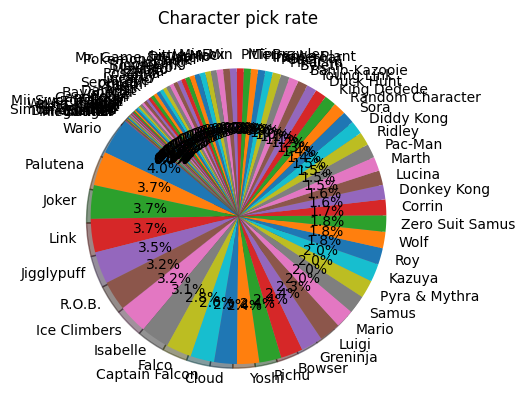

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df =  pd.read_csv('character_data2.csv')
country_data = df["Character"]
medal_data = df["Games"]  
plt.pie(medal_data, labels=country_data,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Character pick rate")
plt.show()

In [ ]:
event_ids={}

events = requests.post(url, headers=headers, json={'query': get_all_events_location, 'variables': params_get_events}).json()

for tournament in events['data']['tournaments']['nodes']:
    for event in tournament['events']:
        if (is_singles(event['name'])):
            event_ids[event['id']] = [tournament['slug'], event['slug']]
            print(event_ids[event['id']][0].split("/")[-1])
            print(event_ids[event['id']][1].split("/")[-1])
            print()

KeyError: 'slug'